In [ ]:
import keras
from keras.datasets import fashion_mnist 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

In [3]:
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape #60000 images of dimensions 28 x 28

(60000, 28, 28)

In [5]:
X = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2])
X.shape

(60000, 784)

In [6]:
y = y_train

In [7]:
print ("The shape of X is " + str(X.shape))
print ("The shape of y is " + str(y.shape)) 

The shape of X is (60000, 784)
The shape of y is (60000,)


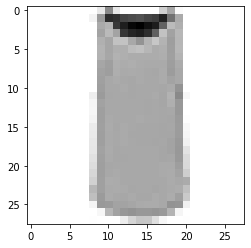

0

In [8]:
#Visualise an image 
n= 2 
plt.imshow(X[n].reshape(X_train.shape[1], X_train.shape[2]), cmap = plt.cm.binary)
plt.show()
y[n]

**PCA**

In [9]:
Clus_dataSet = StandardScaler().fit_transform(X) #(mean = 0 and variance = 1)

In [10]:
from sklearn.decomposition import PCA
# Make an instance of the Model
variance = 0.98 
pca = PCA(variance)

In [11]:
pca.fit(Clus_dataSet)

PCA(n_components=0.98)

In [12]:
print("Number of components before PCA  = " + str(X.shape[1]))
print("Number of components after PCA 0.98 = " + str(pca.n_components_)) #dimension reduced from 784

Number of components before PCA  = 784
Number of components after PCA 0.98 = 420


In [13]:
#Transform our data according to our PCA instance
Clus_dataSet = pca.transform(Clus_dataSet)

In [14]:
print("Dimension of our data after PCA  = " + str(Clus_dataSet.shape)) 

Dimension of our data after PCA  = (60000, 420)


In [15]:
#To visualise the data inversed from PCA
approximation = pca.inverse_transform(Clus_dataSet)
print("Dimension of our data after inverse transforming the PCA  = " + str(approximation.shape))

Dimension of our data after inverse transforming the PCA  = (60000, 784)


3


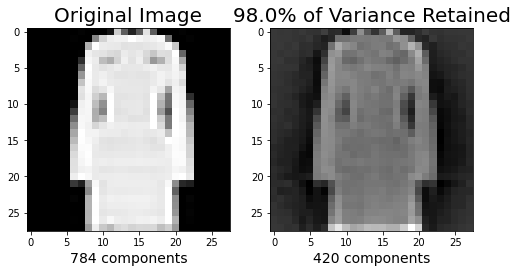

In [16]:
#image reconstruction using the less dimensioned data
plt.figure(figsize=(8,4));

n = 500 #index value, change to view different data

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(X[n].reshape(X_train.shape[1], X_train.shape[2]),
              cmap = plt.cm.gray,);
plt.xlabel(str(X.shape[1])+' components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 196 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[n].reshape(X_train.shape[1], X_train.shape[2]),
              cmap = plt.cm.gray,);
plt.xlabel(str(Clus_dataSet.shape[1]) +' components', fontsize = 14)
plt.title(str(variance * 100) + '% of Variance Retained', fontsize = 20);

print(y_train[n])

**K-means**

In [17]:
k_means = KMeans(init = "k-means++", n_clusters = 10, n_init = 35)

In [18]:
k_means.fit(Clus_dataSet)

KMeans(n_clusters=10, n_init=35)

In [19]:
k_means_labels = k_means.labels_ #List of labels of each dataset
print("The list of labels of the clusters are " + str(np.unique(k_means_labels)))

The list of labels of the clusters are [0 1 2 3 4 5 6 7 8 9]


In [20]:
G = len(np.unique(k_means_labels)) #Number of labels

#2D matrix  for an array of indexes of the given label
cluster_index= [[] for i in range(G)]
for i, label in enumerate(k_means_labels,0):
    for n in range(G):
        if label == n:
            cluster_index[n].append(i)
        else:
            continue   

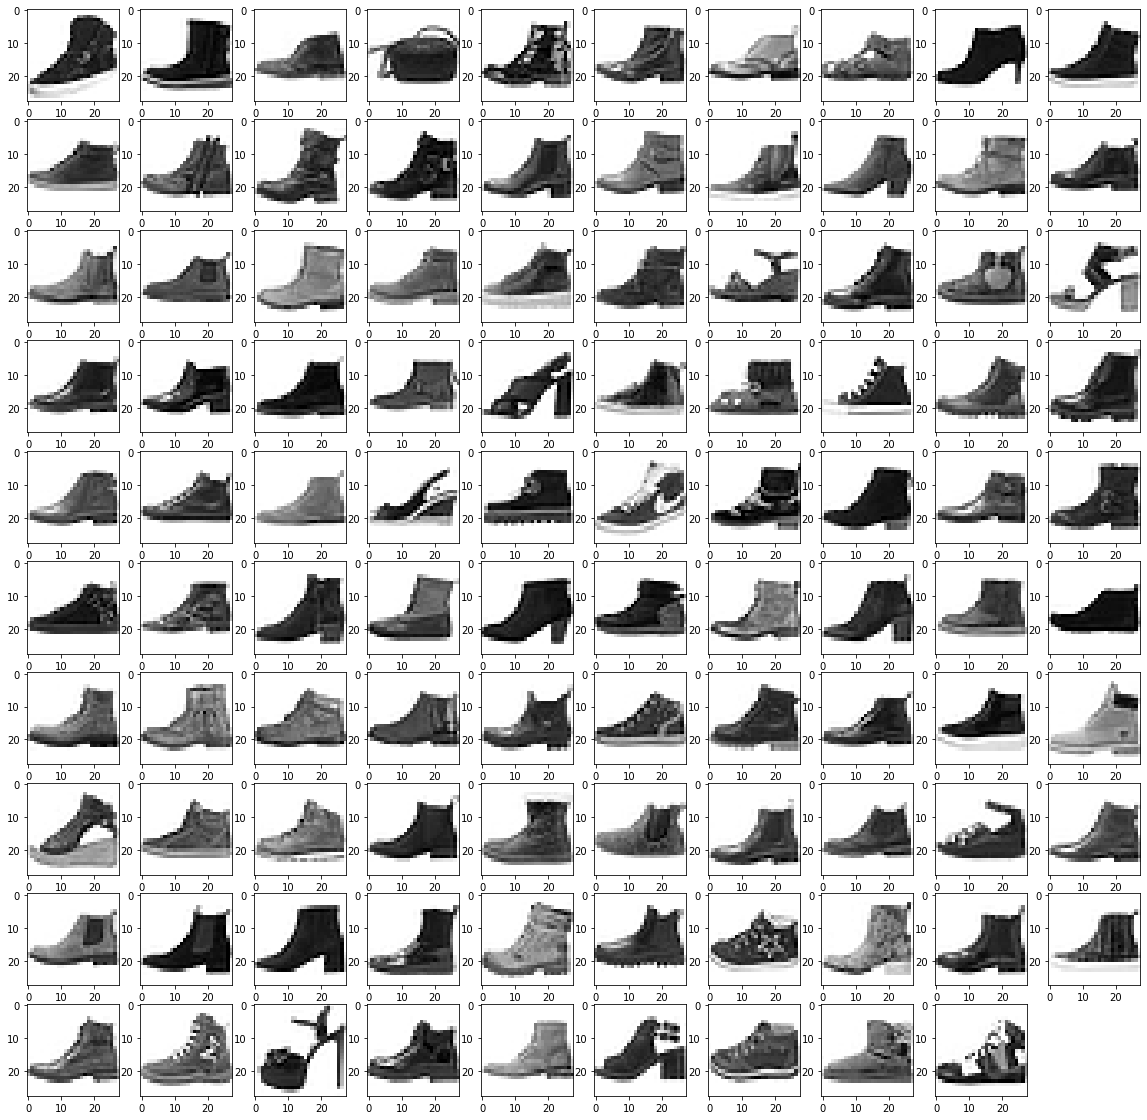

In [21]:
#Visualisation for clusters = clust
plt.figure(figsize=(20,20));
clust = 8 #enter label number to visualise
num = 100 #num of data to visualize from the cluster
for i in range(1,num): 
    plt.subplot(10, 10, i); #(Number of rows, Number of column per row, item number)
    plt.imshow(X[cluster_index[clust][i+500]].reshape(X_train.shape[1], X_train.shape[2]), cmap = plt.cm.binary);
    
plt.show()

In [22]:
Y_clust = [[] for i in range(G)]
for n in range(G):
    Y_clust[n] = y[cluster_index[n]] #Y_clust[0] contains array of "correct" category from y_train for the cluster_index[0]
    assert(len(Y_clust[n]) == len(cluster_index[n])) #dimension confirmation

In [23]:
#counts the number of each category in each cluster
def counter(cluster):
    unique, counts = np.unique(cluster, return_counts=True)
    label_index = dict(zip(unique, counts))
    return label_index

In [24]:
label_count= [[] for i in range(G)]
for n in range(G):
    label_count[n] = counter(Y_clust[n])

label_count[1] #Number of items of a certain category in cluster 1

{0: 2, 2: 3, 5: 1374, 6: 7, 7: 4779, 8: 304, 9: 250}

In [25]:
class_names = {0:'T-shirt/top', 1:'Trouser',2: 'Pullover',3: 'Dress',4: 'Coat',5:
               'Sandal',6: 'Shirt', 7:'Sneaker',8:  'Bag',9: 'Ankle boot'} #Dictionary of class names

#A function to plot a bar graph for visualising the number of items of certain category in a cluster
def plotter(label_dict):
    plt.bar(range(len(label_dict)), list(label_dict.values()), align='center')
    a = []
    for i in [*label_dict]: a.append(class_names[i])
    plt.xticks(range(len(label_dict)), list(a), rotation=45, rotation_mode='anchor')

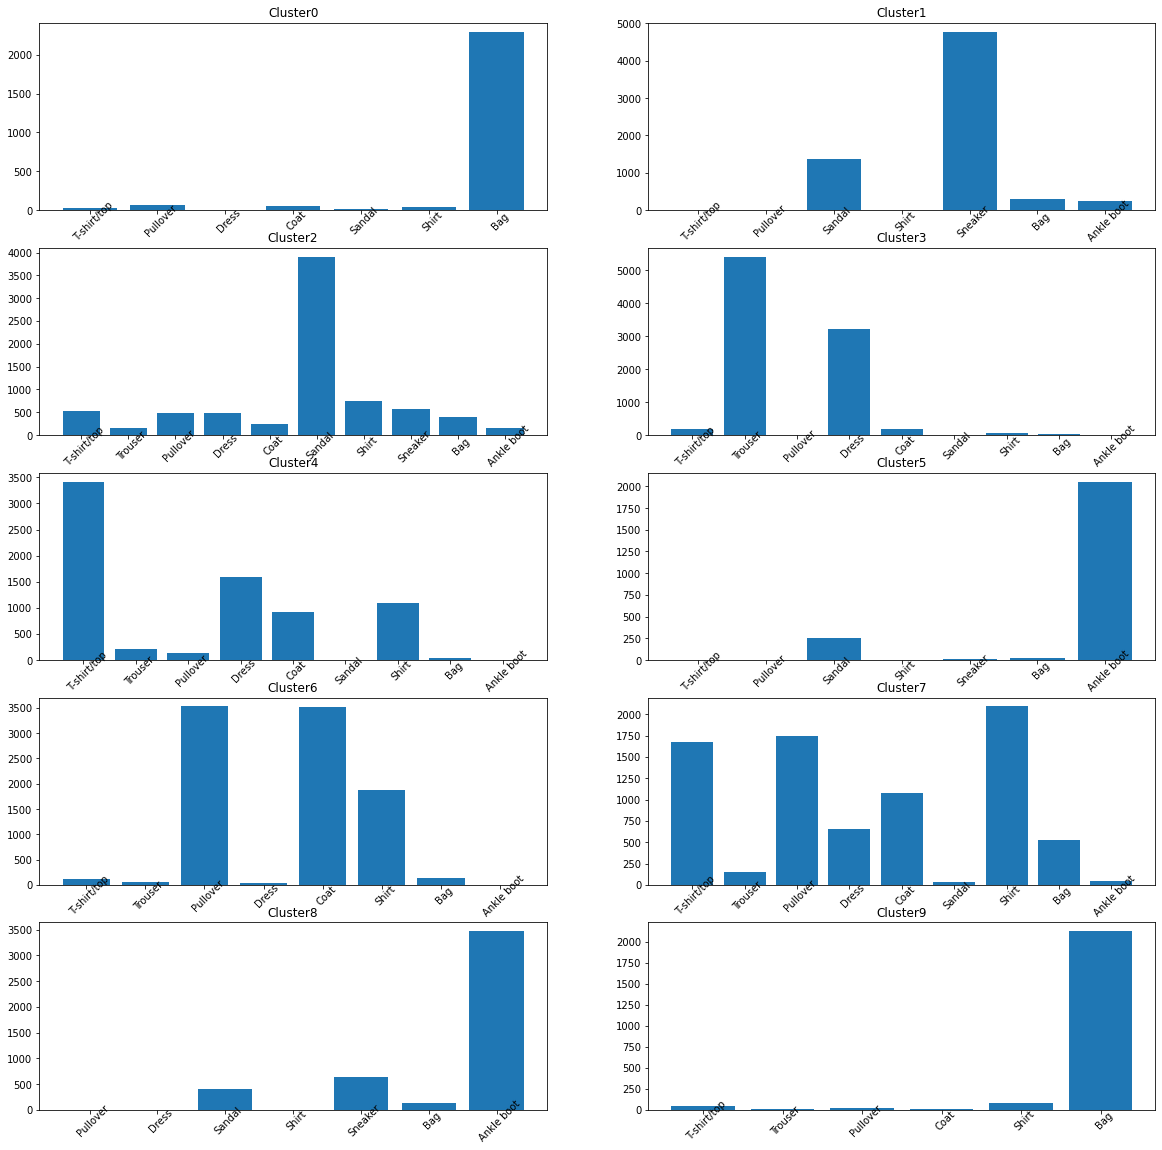

In [26]:
#Bar graph with the number of items of different categories clustered in it
plt.figure(figsize=(20,20))
for i in range (1,11):
    plt.subplot(5, 2, i)
    plotter(label_count[i-1]) 
    plt.title("Cluster" + str(i-1))

In [27]:
k_means_cluster_centers = k_means.cluster_centers_ #numpy array of cluster centers
k_means_cluster_centers.shape #comes from 10 clusters and 420 features 

(10, 420)

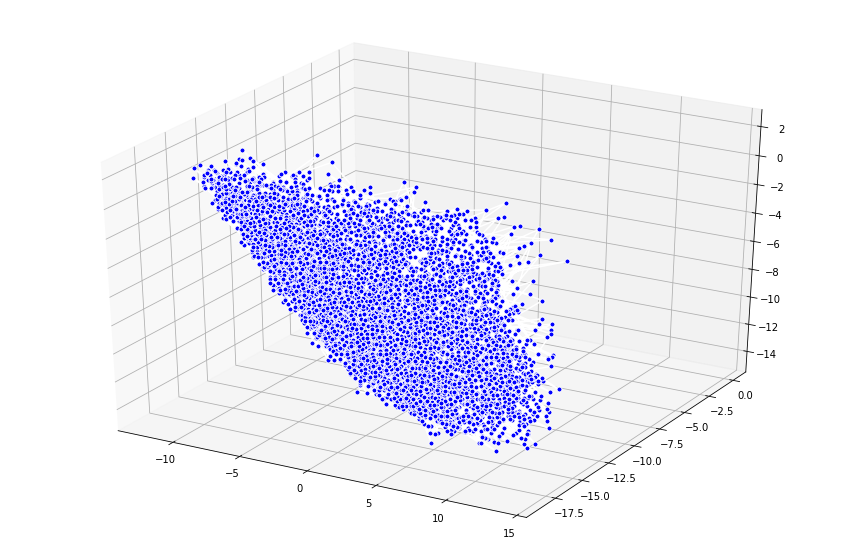

In [32]:
#cluster visualisation
my_members = (k_means_labels == 3) #Enter different Cluster number to view its 3D plot
my_members.shape
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1,projection='3d')
#Clus_dataSet.shape
#Clus_dataSet[my_members,300].shape
ax.plot(Clus_dataSet[my_members, 0], Clus_dataSet[my_members,1],Clus_dataSet[my_members,2], 'w', markerfacecolor="blue", marker='.',markersize=10)

In [33]:
#!pip install chart_studio 
#!pip install plotly
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
#3D Plotly Visualization of Clusters using go
layout = go.Layout(
    title='<b>Cluster Visualisation</b>',
    yaxis=dict(
        title='<i>Y</i>'
    ),
    xaxis=dict(
        title='<i>X</i>'
    )
)
colors = ['red','green' ,'blue','purple','magenta','yellow','cyan','maroon','teal','black']
trace = [ go.Scatter3d() for _ in range(11)]
for i in range(0,10):
    my_members = (k_means_labels == i)
    index = [h for h, g in enumerate(my_members) if g]
    trace[i] = go.Scatter3d(
            x=Clus_dataSet[my_members, 0],# 0 is a component among the 420 components. Feel free to change it
            y=Clus_dataSet[my_members, 1],# 1 is a component among the 420 components. Feel free to change it
            z=Clus_dataSet[my_members, 2],# 2 is a component among the 420 components. Feel free to change it
            mode='markers',
            marker = dict(size = 2,color = colors[i]),
            hovertext=index,
            name='Cluster'+str(i),
   
            )
fig = go.Figure(data=[trace[0],trace[1],trace[2],trace[3],trace[4],trace[5],trace[6],trace[7],trace[8],trace[9]], layout=layout)
    
py.offline.iplot(fig)